In [1]:
import pandas as pd

df = pd.read_json('data/anime.json')

In [3]:
from collections import defaultdict

relation_dic = defaultdict(dict)
sequels = defaultdict(set)
relation_lis = []

for _, row in df.iterrows():
    for relation_type, list_of_dics in row['related'].items():
        anime1 = row['mal_id']
        for dic in list_of_dics:
            if dic['type'] == 'anime':
                anime2 = dic['mal_id']
                relation_dic[anime1][anime2] = relation_type
                relation_lis.append({'anime1': anime1, 'anime2': anime2, 'type': relation_type})
                if relation_type == 'Sequel':
                    sequels[anime1].add(anime2)
                if relation_type == 'Prequel':
                    sequels[anime2].add(anime1)

In [4]:
from collections import Counter

total, correct, missing = 0, 0, 0
values = Counter()

for anime1, dics in relation_dic.items():
    for anime2, type in dics.items():
        if type == 'Sequel':
            total += 1
            if anime2 in relation_dic and anime1 in relation_dic[anime2]:
                correct += 1
                values[relation_dic[anime2][anime1]] += 1
            else:
                missing += 1

print(total, missing)
print(values)
print(round(100*max(values.values()) / sum(values.values()), 1))

3511 166
Counter({'Prequel': 3320, 'Parent story': 7, 'Summary': 5, 'Other': 5, 'Alternative version': 4, 'Sequel': 2, 'Alternative setting': 2})
99.3


In [5]:
"""
Other (95.6%)

Sequel (99.3%)
Prequel (99.3%)

Parent story (86.8%)
Side story (96.2%)

Alternative version (96.9%)

Alternative setting (96.3%)

Character (92.9%)

Spin-off (74.1%) ... Parent story (18.7%) But poques dades

Full story (95.6%)
Summary (93.7%)
"""

'\nOther (95.6%)\n\nSequel (99.3%)\nPrequel (99.3%)\n\nParent story (86.8%)\nSide story (96.2%)\n\nAlternative version (96.9%)\n\nAlternative setting (96.3%)\n\nCharacter (92.9%)\n\nSpin-off (74.1%) ... Parent story (18.7%) But poques dades\n\nFull story (95.6%)\nSummary (93.7%)\n'

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

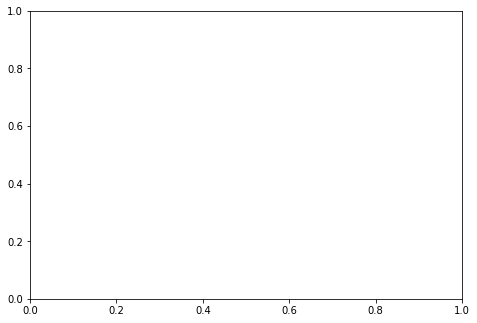

In [7]:
import networkx as nx

G = nx.DiGraph(sequels)

nx.draw(G)

In [74]:
def get_labels(rel):
    labels = {}
    for anime1 in rel:
        for anime2, type in relations[anime1].items():
            labels[(anime1, anime2)] = type
    return labels

In [63]:
first = next(nx.strongly_connected_components(G))
filtered = {k: v for k, v in relations.items() if k in first}
H = nx.DiGraph(first)

In [65]:
nx.set_edge_attributes(H, get_labels(filtered))

In [68]:
nx.get_edge_attributes(H, 'type')

{(1, 5): 'Side story',
 (1, 17205): 'Side story',
 (1, 4037): 'Summary',
 (5, 1): 'Parent story',
 (4037, 1): 'Full story',
 (17205, 1): 'Parent story'}

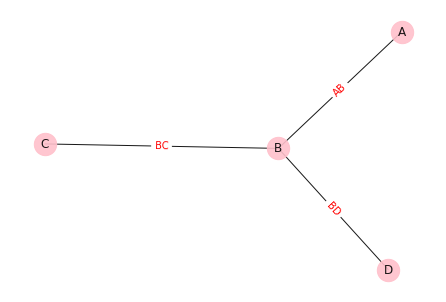

In [76]:
import matplotlib.pyplot as plt
import networkx as nx

edges = [['A', 'B'], ['B', 'C'], ['B', 'D']]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure()
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={('A', 'B'): 'AB', 
                 ('B', 'C'): 'BC', 
                 ('B', 'D'): 'BD'},
    font_color='red'
)
plt.axis('off')
plt.show()

In [20]:
relations = pd.DataFrame(related)

relations.head()

,anime1,anime2,type
0,1,5,Side story
1,1,17205,Side story
2,1,4037,Summary
3,5,1,Parent story
4,6,4106,Side story


In [25]:
relations.type.value_counts()

Other                  4200
Sequel                 3520
Prequel                3430
Parent story           2254
Alternative version    1922
Side story             1874
Alternative setting     865
Character               641
Spin-off                627
Full story              589
Summary                 556
Name: type, dtype: int64